In [44]:
"""
Simple Exponential Smoothing Forecasting

"""

# Load necessary Libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [45]:
#predefine plotting styles
plt.style.use("fivethirtyeight")
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'
#it groups together all families and predefine all the settigs for plots


In [46]:
# read the data files
df=pd.read_csv("C:/Users/Preeti Singla/Downloads/tsfdataset/ES _original_converted.csv", index_col=0)
df.head()

,Calls Received
Period,
1,29
2,43
3,40
4,55
5,75


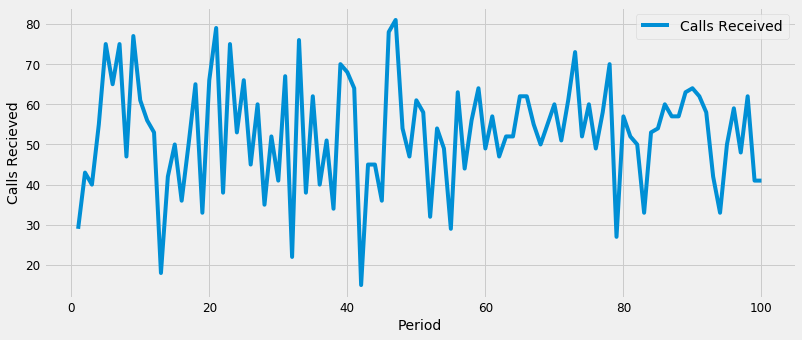

In [47]:
# Plot the time-series
df.plot(figsize=(12,5))
plt.xlabel('Period')
plt.ylabel('Calls Recieved')
plt.show()

#inference: linearly increasing and seasonality in data too

#### No trend and seasonality is found, so we move to Smoothing Exponential Smoothing

In [48]:
Exp_pred=df.copy()
Exp_pred.head()

,Calls Received
Period,
1,29
2,43
3,40
4,55
5,75


In [62]:
model=SimpleExpSmoothing(df['Calls Received']).fit(optimized=True)
Exp_pred['SES']=model.forecast(steps=len(df))
#here optimized alpha will be taken

In [63]:
Exp_pred.tail()

,Calls Received,SES
Period,,
96,59,NaN
97,48,NaN
98,62,NaN
99,41,NaN
100,41,52.810001


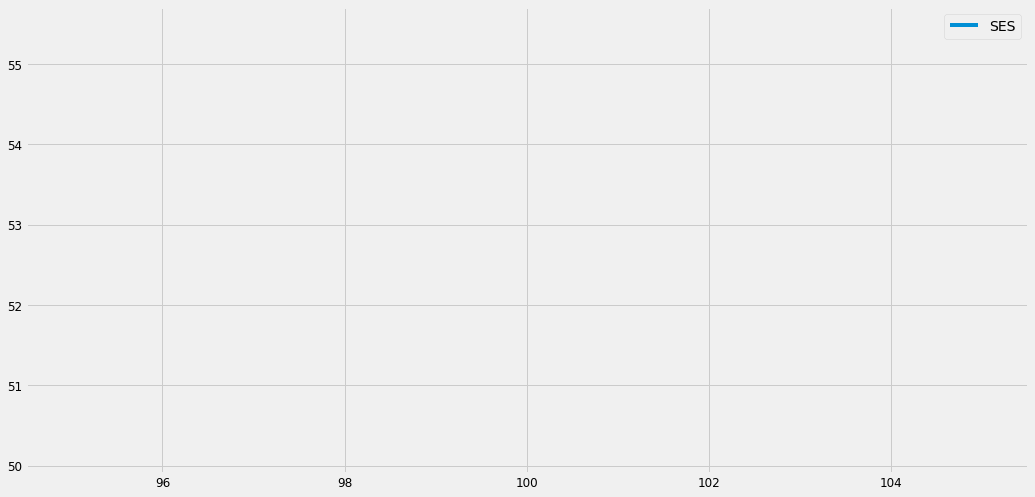

In [51]:
plt.figure(figsize=(16,8))
#plt.plot(df['Calls Received'],label="Original")
plt.plot(Exp_pred['SES'],label="SES")#Simple Exponential Smoothing
plt.legend(loc="best")
plt.show()

In [52]:
print("\nERRORS\n")
rmse_ses_alpha = sqrt(mean_squared_error(df['Calls Received'],Exp_pred.SES))
print("RMSE using Exponential Smoothing with optimized aplha Forecasting : ",rmse_ses)


ERRORS



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [53]:
# Parameters and model errors

#Display the smoothing parameter value
Alpha=print('Aplha : %s'%model.model.params['smoothing_level'])

Aplha : 0.0


In [56]:
#Display the parameters values at top of the forecasted column
Alpha=model.forecast(len(df)).rename(r'$\alpha = %s$'%model.model.params['smoothing_level'])

In [57]:
#Compute the root mean square error
rms=sqrt(mean_squared_error(df['Calls Received'], Exp_pred.SES))
print(rms)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Limitation : Doeasnt work properly in Python
Solution: manually find alpha using gridsearch and use for loop to find all the predicteds